# Weighted Maxcut: Classical Computer v.s. D-Wave

In [1]:
# IMPORTS
from GraphTools import *
from matplotlib import pyplot as plt

In [5]:
NODE_RANGE = range(3, 20) # Determine what graph sizes to test the Maxcut solutions on

def plot_time_growth(node_range, time_data, units, log_scale=False):
    """Plot the growth in time taken to solve the Max Cut problem as the number of nodes increases"""
    x = node_range
    y = time_data
    
    plt.xlabel("Number of Nodes")
    plt.ylabel(f"Solve Time ({units})")
    
    if log_scale:
        plt.yscale("log")
        print("Using logarithmic scale")
    
    plt.scatter(x,y)

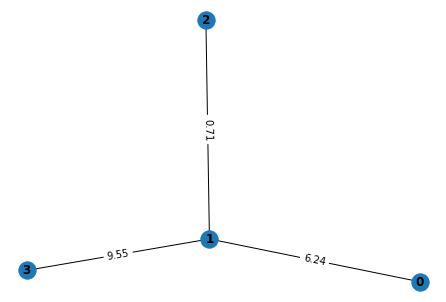

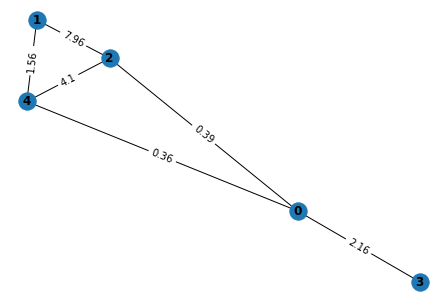

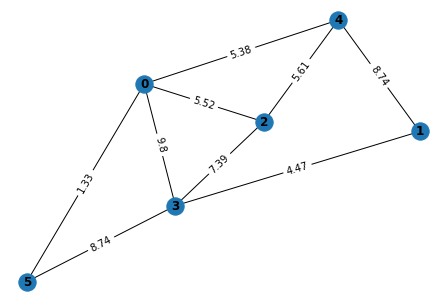

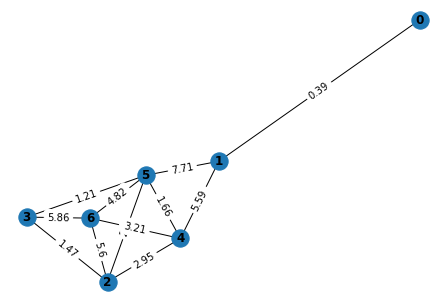

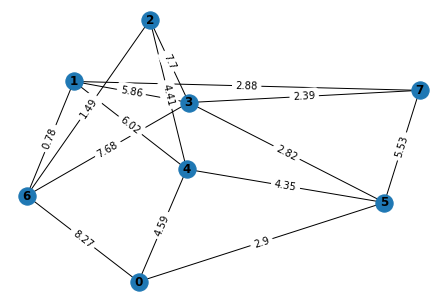

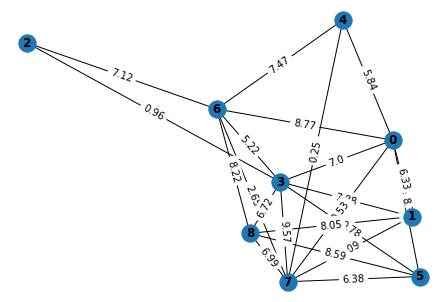

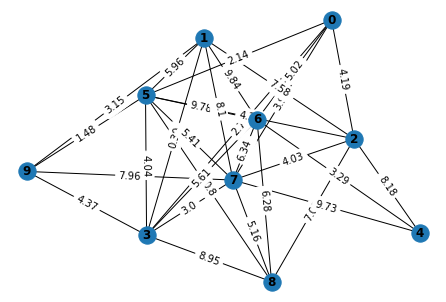

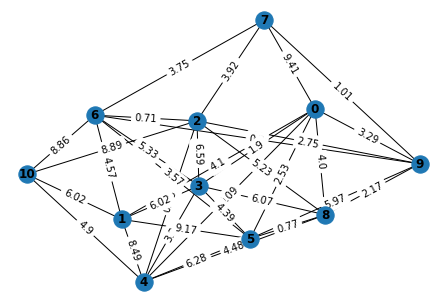

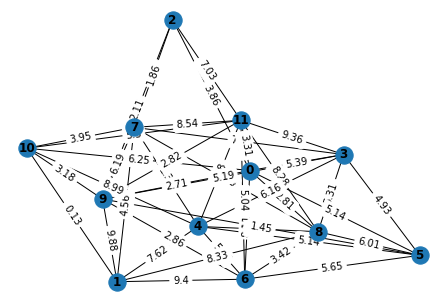

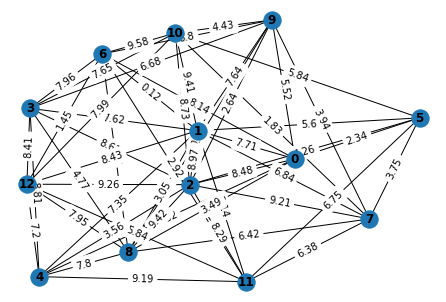

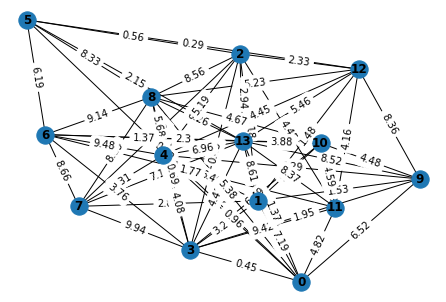

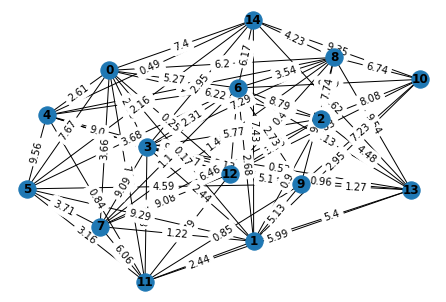

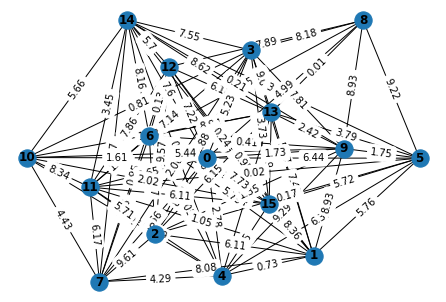

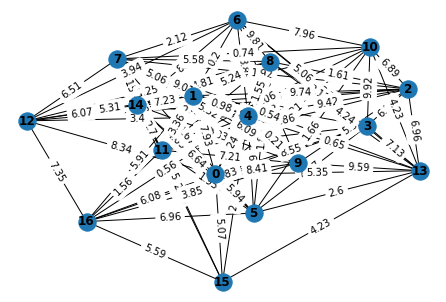

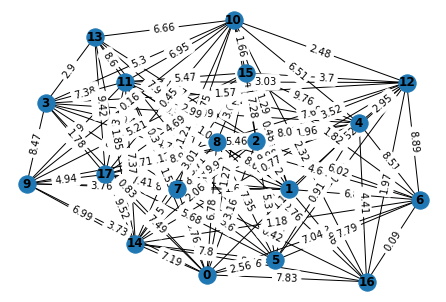

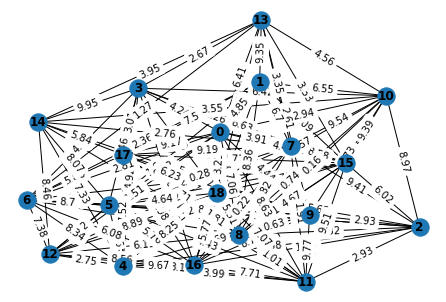

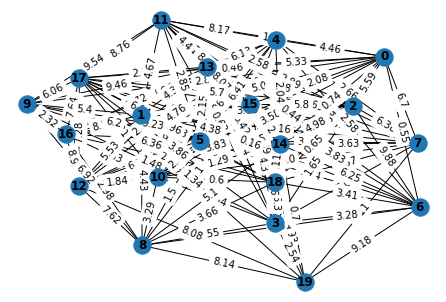

In [6]:
# Generate Graphs
graphs = []
positions = [] # Save the positions so that the graphs are drawn exactly the same way each time
for n in NODE_RANGE:
    G = generate_random_connected_graph(n, 10, math.floor(n*(n-1)/2))
    graphs.append(G)
    positions.append(nx.spring_layout(G))
    
for graph, pos in zip(graphs, positions):
    plt.figure()
    graph.draw_original(pos)
    

In [7]:
for graph in graphs:
    print(len(list(graph.nodes)),len(list(graph.edges)))

4 3
5 6
6 9
7 12
8 15
9 22
10 30
11 34
12 43
13 53
14 60
15 74
16 85
17 91
18 108
19 117
20 131


## Classical Solution
Find the maximum cut for each graph classically by trying each possible configuration. The time complexity should be $O(2^n)$

In [8]:
# Solve Max Cut Classically
solutions = []
for graph in graphs:
    solutions.append(graph.solve_maxcut_classical())

Solution: 0100, Cut Value: -16.5
Solution: 00110, Cut Value: -14.61
Solution: 000110, Cut Value: -50.13
Solution: 0110001, Cut Value: -34.3
Solution: 01100110, Cut Value: -58.42
Solution: 010101100, Cut Value: -101.31
Solution: 0011001100, Cut Value: -126.38
Solution: 01010001111, Cut Value: -114.26
Solution: 001100101110, Cut Value: -159.95999999999998
Solution: 0010111101001, Cut Value: -226.40999999999994
Solution: 01011100110100, Cut Value: -214.42000000000002
Solution: 011010001001101, Cut Value: -253.48999999999995
Solution: 0010000111010111, Cut Value: -310.53000000000014
Solution: 01011100111010010, Cut Value: -312.80000000000007
Solution: 000000111111000111, Cut Value: -350.42
Solution: 0011110010111100010, Cut Value: -419.35999999999984
Solution: 01001011101011100100, Cut Value: -425.99


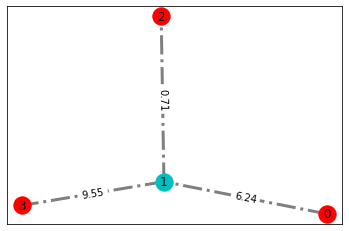

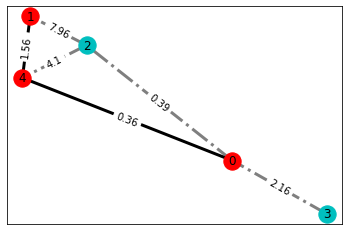

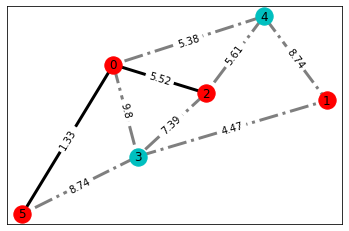

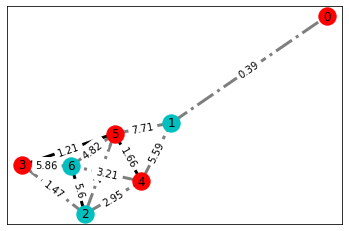

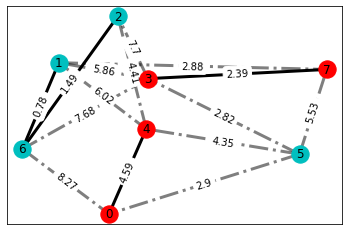

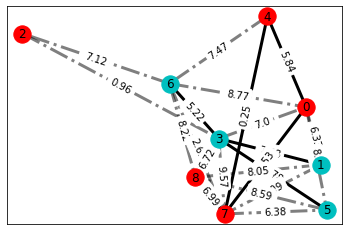

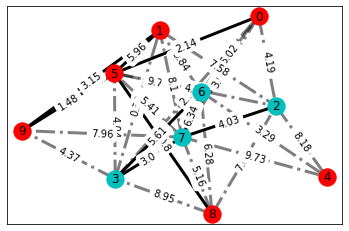

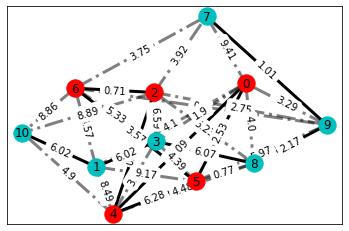

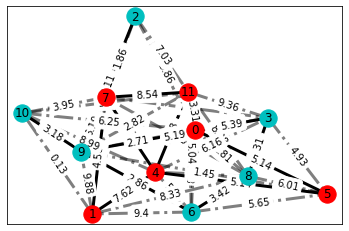

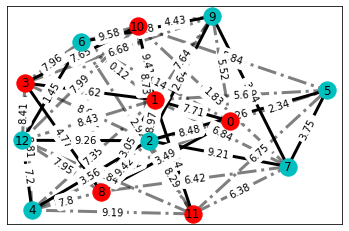

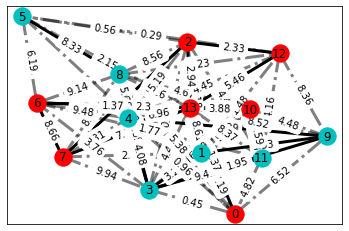

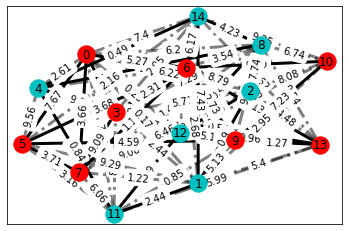

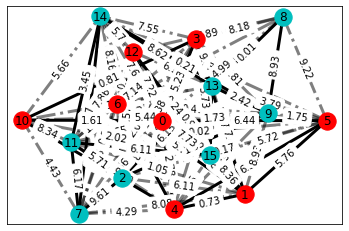

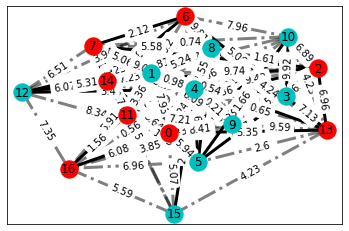

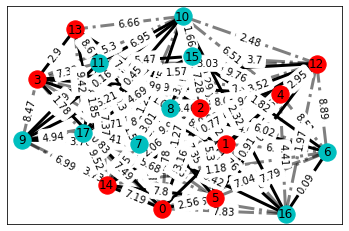

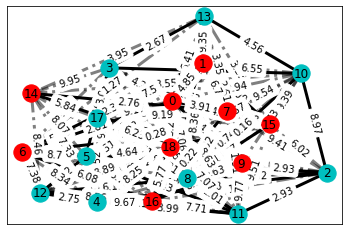

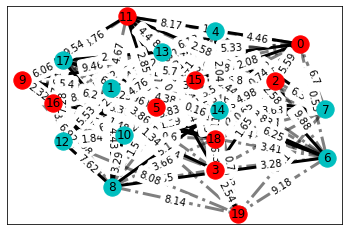

In [9]:
# Display solutions
for graph, pos, solution in zip(graphs, positions, solutions):
    print(f"Solution: {solution}, Cut Value: {graph.get_cut_size(solution)}")
    plt.figure()
    graph.draw_cut(pos, solution)

In [10]:
# Solve again, but this time keeping track of runtimes.
classical_times = []
for graph in graphs:
    t = %timeit -o graph.solve_maxcut_classical()
    classical_times.append(t)

227 µs ± 31.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
502 µs ± 31.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.29 ms ± 99.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.95 ms ± 41.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.89 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
18.9 ms ± 858 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
45.9 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
103 ms ± 6.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
278 ms ± 22.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
617 ms ± 35.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.46 s ± 189 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.52 s ± 323 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.59 s ± 410 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
17.9 s ± 1.81 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
43.4 s ± 1.24 s per loo

In [11]:
# Print average solve time for each number of nodes
for t in classical_times:
    print(str(t.average) + " seconds")

0.000226664246742858 seconds
0.0005024925911428519 seconds
0.0012887991564285814 seconds
0.002954478708571254 seconds
0.006889734381428525 seconds
0.01886486059285695 seconds
0.04594566044285264 seconds
0.10270014607143106 seconds
0.27820663214283414 seconds
0.6171951101428509 seconds
1.4620175585714443 seconds
3.5205249451428733 seconds
7.590640940571428 seconds
17.881969384428576 seconds
43.414925392714295 seconds
76.74311456057141 seconds
164.02346423514277 seconds


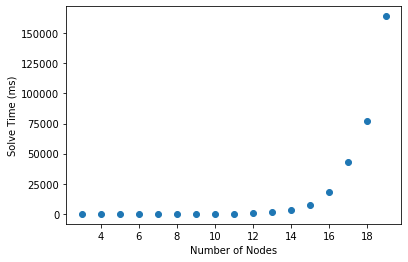

In [12]:
plot_time_growth(NODE_RANGE, [t.average * 1000 for t in classical_times], "ms")

Using logarithmic scale


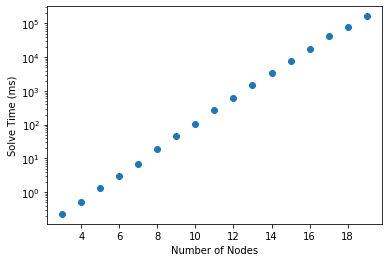

In [13]:
# Plot the same data using a logarithmic scale
plot_time_growth(NODE_RANGE, [t.average * 1000 for t in classical_times], "ms", log_scale=True)

## D-Wave Solution
Find the maximum cut with D-Wave's Quantum Computer.

In [14]:
# Solve Max Cut 
dwave_solutions = []
dwave_solve_times = []
for graph in graphs:
    sol, runtime = graph.solve_maxcut_dwave(return_runtime = True)
    dwave_solutions.append(sol)
    dwave_solve_times.append(runtime)

Solution: 0100, Cut Value: -16.5
Solution: 11001, Cut Value: -14.61
Solution: 000110, Cut Value: -50.13
Solution: 0110001, Cut Value: -34.3
Solution: 10011001, Cut Value: -58.42
Solution: 010101100, Cut Value: -101.31
Solution: 0011001100, Cut Value: -126.38
Solution: 01010001111, Cut Value: -114.26
Solution: 110011010001, Cut Value: -159.95999999999998
Solution: 1101000010110, Cut Value: -226.40999999999994
Solution: 10100011001011, Cut Value: -214.42000000000002
Solution: 100101010110010, Cut Value: -249.75
Solution: 1101111000101000, Cut Value: -310.53000000000014
Solution: 10100011000101101, Cut Value: -312.80000000000007
Solution: 111111000000111000, Cut Value: -350.42
Solution: 0011110010111100010, Cut Value: -419.35999999999984
Solution: 00101001111010110100, Cut Value: -385.41999999999985


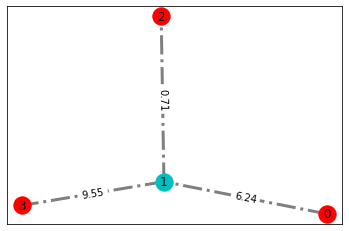

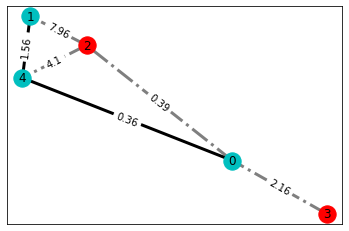

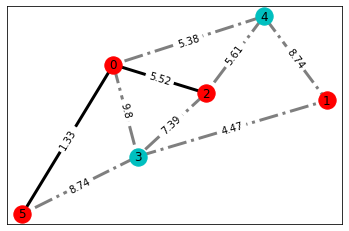

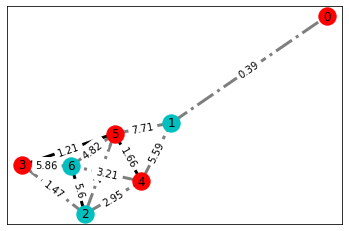

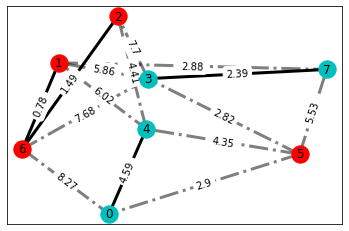

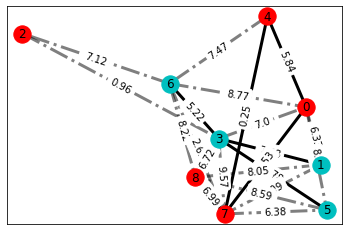

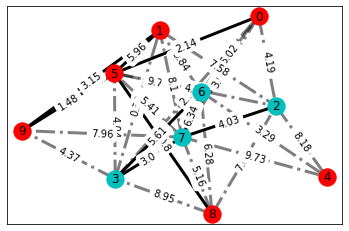

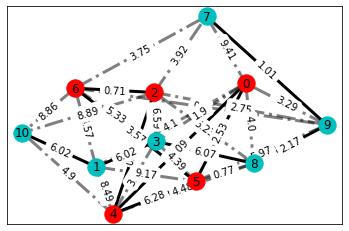

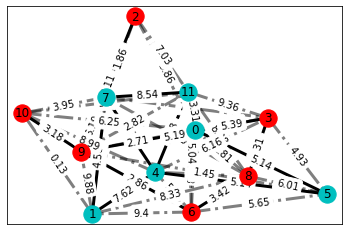

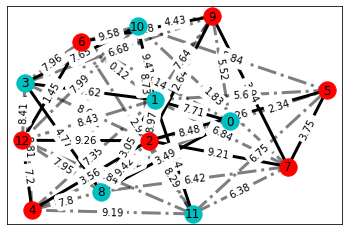

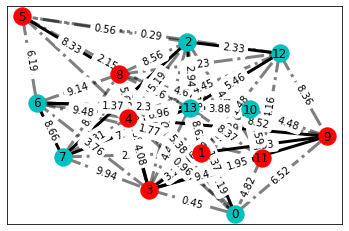

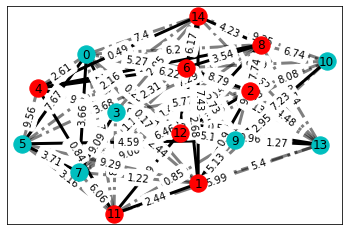

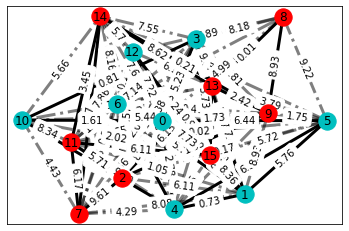

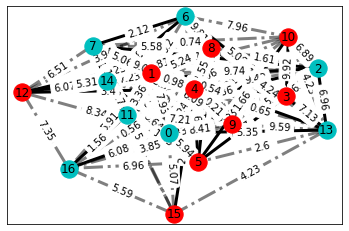

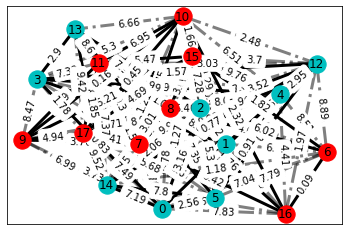

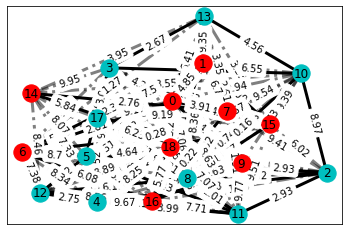

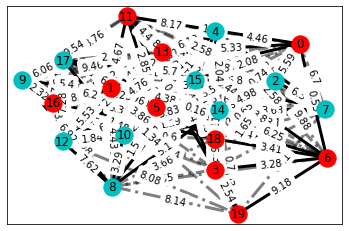

In [15]:
# Display Results
for graph, pos, solution in zip(graphs, positions, dwave_solutions):
    print(f"Solution: {solution}, Cut Value: {graph.get_cut_size(solution)}")
    plt.figure()
    graph.draw_cut(pos, solution)

In [16]:
# Display Runtimes
for runtime in dwave_solve_times:
    print(runtime)

28049
28030
28115
28056
28044
28160
28315
28107
28194
28273
28363
28178
28254
28357
28119
28375
28272


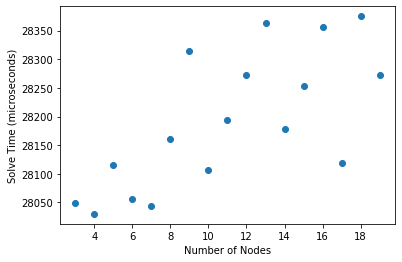

In [17]:
# Plot runtimes
plot_time_growth(NODE_RANGE, dwave_solve_times, "microseconds")

In [18]:
# Compare accuracy of solution
print("Ratios between D-Wave solutions and actual solutions (to compare accuracy):")
for graph, solution, dwave_solution in zip(graphs, solutions, dwave_solutions):
    print(graph.get_cut_size(dwave_solution) / graph.get_cut_size(solution))

Ratios between D-Wave solutions and actual solutions (to compare accuracy):
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9852459663103083
1.0
1.0
1.0
1.0
0.904763022606164
